# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
%matplotlib inline
import pandas as pd

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
# Read JSON data

wb_df = pd.read_json('data/world_bank_projects.json')

#wb_df

In [9]:
# Find the ten countries with the most projects

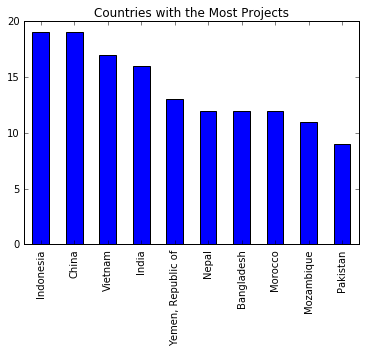

In [10]:
# Set the data frame
wb = wb_df
# Create plot, using value_counts.head(10) to find top 10 countries
# Note - Africa not a country, so it needs to be removed from the count
wb.countryshortname[wb.countryshortname != 'Africa'].value_counts().head(10).plot(kind = 'bar', title = 'Countries with the Most Projects')

In [24]:
wb.countryshortname[wb.countryshortname != 'Africa'].value_counts().head(10)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Pakistan               9
Name: countryshortname, dtype: int64

In [12]:
# Find the top ten major project themes

In [13]:
#wb.mjtheme_namecode.value_counts().head(10)

In [14]:
#wb.mjtheme_namecode.value_counts()

In [15]:
#wb.mjtheme_namecode

In [16]:
# Load data
wb2 = json.load((open('data/world_bank_projects.json')))
# Normalize JSON file
wb_namecode = json_normalize(wb2,'mjtheme_namecode', ['id'])
# Sample the data
wb_namecode.head(15)
# Map these blank codes to their appropriate values.

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310
5,2,Public sector governance,P145310
6,11,Environment and natural resources management,P145310
7,6,Social protection and risk management,P145310
8,7,Social dev/gender/inclusion,P144665
9,7,Social dev/gender/inclusion,P144665


In [17]:
# extract the theme names that are not null to create a dictionary
not_null_theme_names = wb_namecode[wb_namecode.name != '']
#not_null_theme_names

In [18]:
# creating dictionary of theme names
theme_names_dict = dict([(code, name) for code, name in zip(not_null_theme_names.code, not_null_theme_names.name)])
theme_names_dict

{u'1': u'Economic management',
 u'10': u'Rural development',
 u'11': u'Environment and natural resources management',
 u'2': u'Public sector governance',
 u'3': u'Rule of law',
 u'4': u'Financial and private sector development',
 u'5': u'Trade and integration',
 u'6': u'Social protection and risk management',
 u'7': u'Social dev/gender/inclusion',
 u'8': u'Human development',
 u'9': u'Urban development'}

In [19]:
# find the values in the original data frame that are null
empty_theme_names = wb_namecode[wb_namecode.name == '']
#empty_theme_names 

In [20]:
# looping through each empty value and update it with the name
# of the value from theme_names_dict
for theme_code in empty_theme_names.code.unique():
    wb_namecode.loc[(wb_namecode.code == theme_code) & (wb_namecode.name == ''), 'name'] = theme_names_dict.get(theme_code)

In [21]:
#check for empty theme names to confirm that for loop worked
wb_namecode[wb_namecode.name == '']

,code,name,id


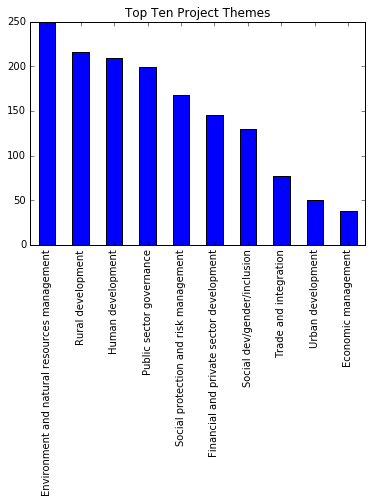

In [22]:
#NOW, you can make your plot of top ten major project themes
wb_namecode.name.value_counts().head(10).plot(kind = 'bar', title = 'Top Ten Project Themes')

In [23]:
# Exact figures of each
wb_namecode.name.value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64